<a href="https://colab.research.google.com/github/iam-fern/Generate_addition_4X/blob/main/GQtest_data_add_delta_(1_2)_n60_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition_4X/addition_delta_1.2'

In [4]:
os.listdir(base_path)

['data_add_delta_1.2_n20.csv',
 'data_add_delta_1.2_n30.csv',
 'data_add_delta_1.2_n60.csv',
 'data_add_delta_1.2_n120.csv',
 'data_add_delta_1.2_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_1.2_n60.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,94.235658,44.894597,62.296045,37.460574,11.175415,260.062289,246.705576,13.356713
1,0.0,1.0,99.796956,61.694131,33.592017,70.534525,-14.556973,261.060655,273.152142,-12.091487
2,0.0,2.0,74.910739,20.540354,83.045059,35.061306,2.667908,226.225365,222.978576,3.246789
3,0.0,3.0,90.957667,61.423783,89.663998,73.300235,-9.333727,316.011957,323.553625,-7.541668
4,0.0,4.0,68.348319,34.956288,69.047703,55.752509,15.753544,253.858363,237.010719,16.847644
...,...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,87.853232,61.341537,60.260296,60.466037,4.062384,283.983486,283.523314,0.460172
59996,999.0,56.0,45.607330,88.054815,55.804947,84.386691,3.509487,287.363271,281.765368,5.597903
59997,999.0,57.0,51.444281,32.168463,57.886940,55.681308,-3.745103,203.435889,207.169149,-3.733260
59998,999.0,58.0,66.283319,31.163881,74.353252,28.224836,3.013747,213.039035,211.316166,1.722869


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,94.235658,44.894597,62.296045,37.460574,11.175415,260.062289,246.705576,13.356713
1,0.0,1.0,99.796956,61.694131,33.592017,70.534525,-14.556973,261.060655,273.152142,-12.091487
2,0.0,2.0,74.910739,20.540354,83.045059,35.061306,2.667908,226.225365,222.978576,3.246789
3,0.0,3.0,90.957667,61.423783,89.663998,73.300235,-9.333727,316.011957,323.553625,-7.541668
4,0.0,4.0,68.348319,34.956288,69.047703,55.752509,15.753544,253.858363,237.010719,16.847644
...,...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,87.853232,61.341537,60.260296,60.466037,4.062384,283.983486,283.523314,0.460172
59996,999.0,56.0,45.607330,88.054815,55.804947,84.386691,3.509487,287.363271,281.765368,5.597903
59997,999.0,57.0,51.444281,32.168463,57.886940,55.681308,-3.745103,203.435889,207.169149,-3.733260
59998,999.0,58.0,66.283319,31.163881,74.353252,28.224836,3.013747,213.039035,211.316166,1.722869


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         x4          e  \
rep   index                                                          
0.0   0.0    94.235658  44.894597  62.296045  37.460574  11.175415   
      1.0    99.796956  61.694131  33.592017  70.534525 -14.556973   
      2.0    74.910739  20.540354  83.045059  35.061306   2.667908   
      3.0    90.957667  61.423783  89.663998  73.300235  -9.333727   
      4.0    68.348319  34.956288  69.047703  55.752509  15.753544   
...                ...        ...        ...        ...        ...   
999.0 55.0   87.853232  61.341537  60.260296  60.466037   4.062384   
      56.0   45.607330  88.054815  55.804947  84.386691   3.509487   
      57.0   51.444281  32.168463  57.886940  55.681308  -3.745103   
      58.0   66.283319  31.163881  74.353252  28.224836   3.013747   
      59.0   98.015393  51.458453  53.224837  59.129841   2.590207   

                      Y       y_hat      e_hat  
rep   index                                     
0.0   0.0    260.062289  246.705576  13.356713  
      1.0    261.060655  273.152142 -12.091487  
      2.0    226.225365  222.978576   3.246789  
      3.0    316.011957  323.553625  -7.541668  
      4.0    253.858363  237.010719  16.847644  
...                 ...         ...        ...  
999.0 55.0   283.983486  283.523314   0.460172  
      56.0   287.363271  281.765368   5.597903  
      57.0   203.435889  207.169149  -3.733260  
      58.0   213.039035  211.316166   1.722869  
      59.0   274.418730  277.063258  -2.644528  

[60000 rows x 8 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         x4          e  \
rep   index                                                          
0.0   0.0    94.235658  44.894597  62.296045  37.460574  11.175415   
      1.0    99.796956  61.694131  33.592017  70.534525 -14.556973   
      2.0    74.910739  20.540354  83.045059  35.061306   2.667908   
      3.0    90.957667  61.423783  89.663998  73.300235  -9.333727   
      4.0    68.348319  34.956288  69.047703  55.752509  15.753544   
...                ...        ...        ...        ...        ...   
999.0 55.0   87.853232  61.341537  60.260296  60.466037   4.062384   
      56.0   45.607330  88.054815  55.804947  84.386691   3.509487   
      57.0   51.444281  32.168463  57.886940  55.681308  -3.745103   
      58.0   66.283319  31.163881  74.353252  28.224836   3.013747   
      59.0   98.015393  51.458453  53.224837  59.129841   2.590207   

                      Y       y_hat      e_hat  
rep   index                                     
0.0   0.0    260.062289  246.705576  13.356713  
      1.0    261.060655  273.152142 -12.091487  
      2.0    226.225365  222.978576   3.246789  
      3.0    316.011957  323.553625  -7.541668  
      4.0    253.858363  237.010719  16.847644  
...                 ...         ...        ...  
999.0 55.0   283.983486  283.523314   0.460172  
      56.0   287.363271  281.765368   5.597903  
      57.0   203.435889  207.169149  -3.733260  
      58.0   213.039035  211.316166   1.722869  
      59.0   274.418730  277.063258  -2.644528  

[60000 rows x 8 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,94.235658,44.894597,62.296045,37.460574,11.175415,260.062289,246.705576,13.356713
1,0.0,1.0,99.796956,61.694131,33.592017,70.534525,-14.556973,261.060655,273.152142,-12.091487
2,0.0,2.0,74.910739,20.540354,83.045059,35.061306,2.667908,226.225365,222.978576,3.246789
3,0.0,3.0,90.957667,61.423783,89.663998,73.300235,-9.333727,316.011957,323.553625,-7.541668
4,0.0,4.0,68.348319,34.956288,69.047703,55.752509,15.753544,253.858363,237.010719,16.847644
...,...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,87.853232,61.341537,60.260296,60.466037,4.062384,283.983486,283.523314,0.460172
59996,999.0,56.0,45.607330,88.054815,55.804947,84.386691,3.509487,287.363271,281.765368,5.597903
59997,999.0,57.0,51.444281,32.168463,57.886940,55.681308,-3.745103,203.435889,207.169149,-3.733260
59998,999.0,58.0,66.283319,31.163881,74.353252,28.224836,3.013747,213.039035,211.316166,1.722869


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3         x4          e  \
rep   index                                                          
0.0   0.0    94.235658  44.894597  62.296045  37.460574  11.175415   
      1.0    99.796956  61.694131  33.592017  70.534525 -14.556973   
      2.0    74.910739  20.540354  83.045059  35.061306   2.667908   
      3.0    90.957667  61.423783  89.663998  73.300235  -9.333727   
      4.0    68.348319  34.956288  69.047703  55.752509  15.753544   
...                ...        ...        ...        ...        ...   
999.0 55.0   87.853232  61.341537  60.260296  60.466037   4.062384   
      56.0   45.607330  88.054815  55.804947  84.386691   3.509487   
      57.0   51.444281  32.168463  57.886940  55.681308  -3.745103   
      58.0   66.283319  31.163881  74.353252  28.224836   3.013747   
      59.0   98.015393  51.458453  53.224837  59.129841   2.590207   

                      Y       y_hat      e_hat  
rep   index                                     
0.0   0.0    260.062289  246.705576  13.356713  
      1.0    261.060655  273.152142 -12.091487  
      2.0    226.225365  222.978576   3.246789  
      3.0    316.011957  323.553625  -7.541668  
      4.0    253.858363  237.010719  16.847644  
...                 ...         ...        ...  
999.0 55.0   283.983486  283.523314   0.460172  
      56.0   287.363271  281.765368   5.597903  
      57.0   203.435889  207.169149  -3.733260  
      58.0   213.039035  211.316166   1.722869  
      59.0   274.418730  277.063258  -2.644528  

[60000 rows x 8 columns]

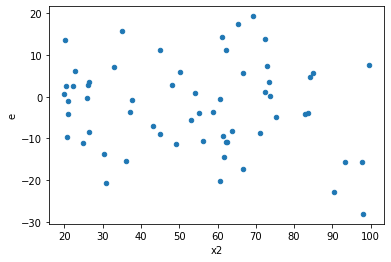

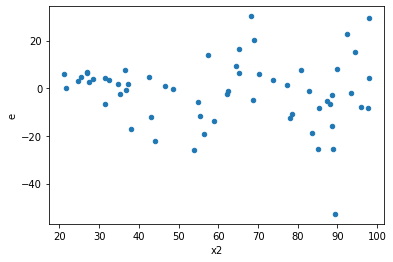

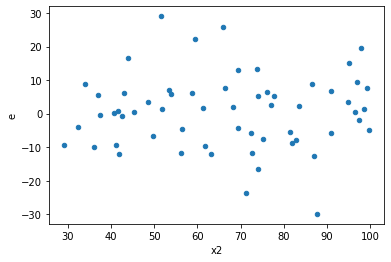

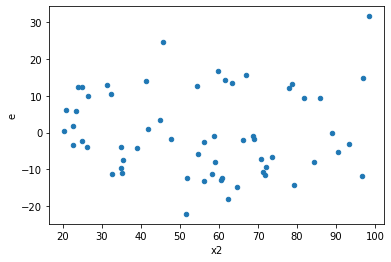

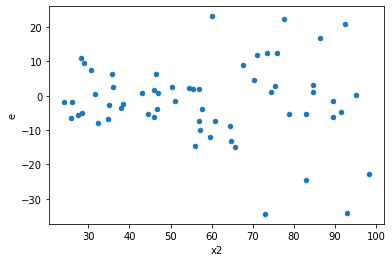

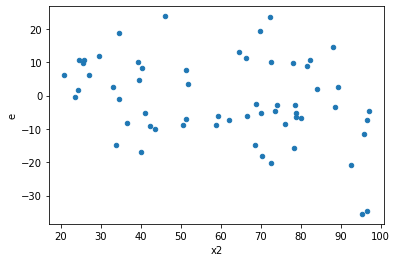

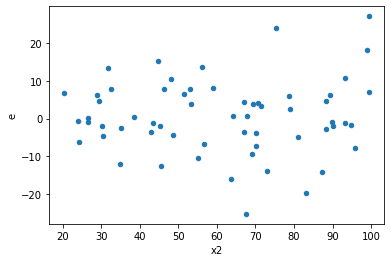

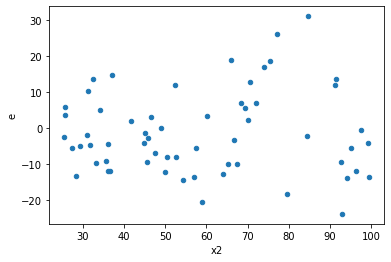

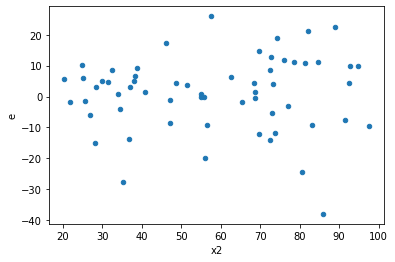

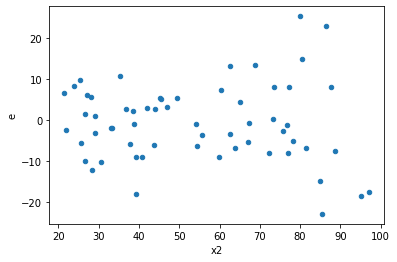

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x2
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3', 'x4']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,20.0,20.0,1872.3207160072702,2649.186982398571,93.6160358003635,132.45934911992856,1.4149215782048126,0.4445344649256102,0.7777327675371949,0.2222672324628051,Reject001=1 : Homoscedasticity
1.0,20.0,20.0,1219.9269229218573,4332.6760450847405,60.99634614609287,216.63380225423703,3.5515865447968893,0.00665073678843342,0.9966746316057833,0.00332536839421671,Reject001=0 : Heteroscedasticity
2.0,20.0,20.0,1912.826930684844,2336.6306921748624,95.6413465342422,116.83153460874311,1.2215588638425772,0.6587935102136508,0.6706032448931746,0.3293967551068254,Reject001=1 : Homoscedasticity
3.0,20.0,20.0,1722.9707754580982,3018.2391705127015,86.14853877290491,150.91195852563507,1.7517645763377623,0.218636402664522,0.890681798667739,0.109318201332261,Reject001=1 : Homoscedasticity
4.0,20.0,20.0,516.6574895288934,4911.083700047244,25.83287447644467,245.5541850023622,9.505492128886672,5.0103454143357595e-06,0.9999974948272928,2.5051727071678798e-06,Reject001=0 : Heteroscedasticity
5.0,20.0,20.0,1572.3813924821607,2477.631672655908,78.61906962410804,123.8815836327954,1.5757192780974847,0.3173491252742242,0.8413254373628879,0.1586745626371121,Reject001=1 : Homoscedasticity
6.0,20.0,20.0,1074.8880575034825,2303.272656230636,53.744402875174124,115.16363281153181,2.142802350581678,0.09621121150793388,0.9518943942460331,0.04810560575396694,Reject001=1 : Homoscedasticity
7.0,20.0,20.0,1196.3493523136372,3954.058446543449,59.817467615681856,197.70292232717244,3.305103512528877,0.01022777601570457,0.9948861119921477,0.005113888007852285,Reject001=1 : Homoscedasticity
8.0,20.0,20.0,1971.3292755733046,4186.579338870463,98.56646377866522,209.32896694352317,2.12373416797806,0.10008732711788504,0.9499563364410575,0.05004366355894252,Reject001=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,20.0,20.0,1872.3207160072702,2649.186982398571,93.6160358003635,132.45934911992856,1.4149215782048126,0.4445344649256102,Reject001=1 : Homoscedasticity
1.0,20.0,20.0,1219.9269229218573,4332.6760450847405,60.99634614609287,216.63380225423703,3.5515865447968893,0.00665073678843342,Reject001=0 : Heteroscedasticity
2.0,20.0,20.0,1912.826930684844,2336.6306921748624,95.6413465342422,116.83153460874311,1.2215588638425772,0.6587935102136508,Reject001=1 : Homoscedasticity
3.0,20.0,20.0,1722.9707754580982,3018.2391705127015,86.14853877290491,150.91195852563507,1.7517645763377623,0.218636402664522,Reject001=1 : Homoscedasticity
4.0,20.0,20.0,516.6574895288934,4911.083700047244,25.83287447644467,245.5541850023622,9.505492128886672,5.0103454143357595e-06,Reject001=0 : Heteroscedasticity
5.0,20.0,20.0,1572.3813924821607,2477.631672655908,78.61906962410804,123.8815836327954,1.5757192780974847,0.3173491252742242,Reject001=1 : Homoscedasticity
6.0,20.0,20.0,1074.8880575034825,2303.272656230636,53.744402875174124,115.16363281153181,2.142802350581678,0.09621121150793388,Reject001=1 : Homoscedasticity
7.0,20.0,20.0,1196.3493523136372,3954.058446543449,59.817467615681856,197.70292232717244,3.305103512528877,0.01022777601570457,Reject001=1 : Homoscedasticity
8.0,20.0,20.0,1971.3292755733046,4186.579338870463,98.56646377866522,209.32896694352317,2.12373416797806,0.10008732711788504,Reject001=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      685
Reject001=0 : Heteroscedasticity    315
Name: Result_test, dtype: int64